In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

listing_data = "Data/listings.csv"
reviews_data = "Data/reviews.csv"
calendar_data = "Data/calendar.csv"

listings_df = pd.read_csv(listing_data)
reviews_df = pd.read_csv(reviews_data)
calendar_df = pd.read_csv(calendar_data)

In [2]:
listings_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1742654,High Floor apt.near Columbus Circle,9173924,Jon,Manhattan,Hell's Kitchen,40.76708,-73.98600,Entire home/apt,200,2,114,2019-04-15,1.87,1,204
1,23502842,Cozy East Village studio,34777741,Tiffany,Manhattan,East Village,40.72205,-73.98132,Entire home/apt,159,2,8,2018-09-08,0.66,1,10
2,15984984,Great Location by Subway!,9737900,Nilu,Brooklyn,Clinton Hill,40.68252,-73.96436,Entire home/apt,180,4,36,2019-04-30,1.24,1,10


In [3]:
listings_df.rename(columns = {'neighbourhood_group': 'borough'}, inplace = True)
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'borough', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [4]:
reviews_df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2539,55688172,2015-12-04,25160947,Peter,Great host
1,5178,2091,2009-05-06,8443,Dimitri,"MR. Kasai was a grreat host , very helpful and..."
2,5178,3015,2009-05-23,15642,Duong,The room is great and the hosts are superb!!


In [5]:
merged_df = pd.merge(listings_df, reviews_df, how="left", on=["id", "id"])
merged_df.head(3)

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,date,reviewer_id,reviewer_name,comments
0,1742654,High Floor apt.near Columbus Circle,9173924,Jon,Manhattan,Hell's Kitchen,40.76708,-73.98600,Entire home/apt,200,...,114,2019-04-15,1.87,1,204,NaN,NaN,NaN,NaN,NaN
1,23502842,Cozy East Village studio,34777741,Tiffany,Manhattan,East Village,40.72205,-73.98132,Entire home/apt,159,...,8,2018-09-08,0.66,1,10,NaN,NaN,NaN,NaN,NaN
2,15984984,Great Location by Subway!,9737900,Nilu,Brooklyn,Clinton Hill,40.68252,-73.96436,Entire home/apt,180,...,36,2019-04-30,1.24,1,10,NaN,NaN,NaN,NaN,NaN


In [6]:
merged_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'borough', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'listing_id',
       'date', 'reviewer_id', 'reviewer_name', 'comments'],
      dtype='object')

In [7]:
organized_df = merged_df[["borough","room_type","price","number_of_reviews", "reviews_per_month", "availability_365", "id"]]
organized_df.head()

,borough,room_type,price,number_of_reviews,reviews_per_month,availability_365,id
0,Manhattan,Entire home/apt,200,114,1.87,204,1742654
1,Manhattan,Entire home/apt,159,8,0.66,10,23502842
2,Brooklyn,Entire home/apt,180,36,1.24,10,15984984
3,Brooklyn,Entire home/apt,99,9,0.27,51,13820083
4,Brooklyn,Entire home/apt,100,122,2.63,257,6170979


In [8]:
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000]

group_names = ["0-50", "50-100", "100-200", "200-500", "500-1000", \
               "1000-5000", "5000-10000"]

In [9]:
#final_df = organized_df.merge(organized_df.merge(organized_df.merge(average_price, total_Airbnb, on="borough"), 
#                             total_House, on="borough"), borough_type, on="borough")

In [10]:
organized_df["Price Summary"] = pd.cut(organized_df["price"], bins, labels=group_names)

total_airbnb = len(organized_df)
price_sum = organized_df.groupby("Price Summary")["id"].count()
percent = round(price_sum / total_airbnb*100, 2)
pd.DataFrame({"Price Summary": price_sum, "Percent(%)": percent})

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Price Summary,Percent(%)
Price Summary,,
0-50,6639,13.57
50-100,17182,35.11
100-200,16583,33.88
200-500,7430,15.18
500-1000,857,1.75
1000-5000,219,0.45
5000-10000,19,0.04


In [11]:
organized_df["Price Summary"] = pd.cut(organized_df["price"], bins, labels=group_names)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


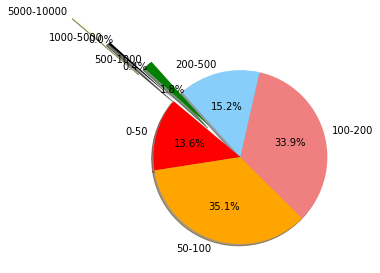

In [12]:
sizes=[6639, 17182, 16583, 7430, 857, 219, 19]
labels=["0-50", "50-100", "100-200", "200-500", "500-1000", \
               "1000-5000", "5000-10000"]
explode = (0, 0, 0, 0, 0.5, 1, 1.5)
colors = ["red", "orange", "lightcoral", "lightskyblue", "green", "black", "yellow"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [13]:
Manhattan = organized_df.loc[organized_df["Price Summary"]=="200-500"]

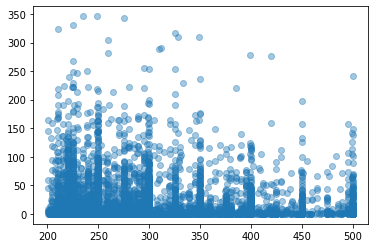

In [14]:
plt.scatter(Manhattan["price"], Manhattan["number_of_reviews"], alpha=0.4)

In [15]:
counts = organized_df["borough"].value_counts()
counts

Manhattan        22091
Brooklyn         19975
Queens            5493
Bronx             1033
Staten Island      349
Name: borough, dtype: int64

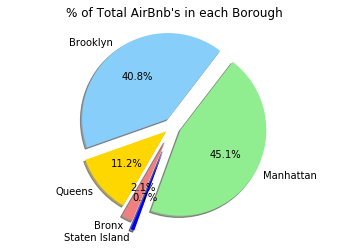

In [16]:
labels = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]

sizes = [22091, 19975, 5493, 1033, 349]

explode = (0.1, 0.1, 0.1, 0.2, 0.3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightgreen", "lightskyblue", "gold", "lightcoral", "blue"])
ax1.axis('equal') 
plt.title("% of Total AirBnb's in each Borough")
plt.show()

# IDK

Manhattan = merged_df.loc[merged_df["borough"] == "Manhattan"].sum()
Brooklyn = merged_df.loc[merged_df["borough"] == "Brooklyn"].sum()
Queens  = merged_df.loc[merged_df["borough"] == "Queens "].sum()                  
Bronx = merged_df.loc[merged_df["borough"] == "Bronx"].sum()  
Staten_Island = merged_df.loc[merged_df["borough"] == "Staten Island"].sum()
                  
labels = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
sizes = [Manhattan, Brooklyn, Queens, Bronx, Staten_Island]
explode = (0.1, 0.1, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightgreen", "lightskyblue", "gold", "lightcoral", "blue"])
ax1.axis('equal') 
plt.show()

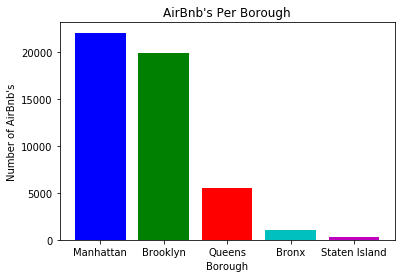

In [17]:
Boroughs = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]
amt_airbnb = [22091, 19975, 5493, 1033, 349]
x_axis = np.arange(len(amt_airbnb))

colors = "bgrcmykw"
    
plt.bar(Boroughs, amt_airbnb, color="bgrcmykw", align="center")
   
plt.title("AirBnb's Per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of AirBnb's")
plt.show()

In [18]:
organized_df.head(10)

,borough,room_type,price,number_of_reviews,reviews_per_month,availability_365,id,Price Summary
0,Manhattan,Entire home/apt,200,114,1.87,204,1742654,100-200
1,Manhattan,Entire home/apt,159,8,0.66,10,23502842,100-200
2,Brooklyn,Entire home/apt,180,36,1.24,10,15984984,100-200
3,Brooklyn,Entire home/apt,99,9,0.27,51,13820083,50-100
4,Brooklyn,Entire home/apt,100,122,2.63,257,6170979,50-100
5,Manhattan,Private room,75,3,0.32,19,27283214,50-100
6,Manhattan,Entire home/apt,200,9,2.13,358,30712669,100-200
7,Manhattan,Entire home/apt,195,28,0.27,208,33014,100-200
8,Brooklyn,Entire home/apt,79,1,0.17,93,29705049,50-100
9,Brooklyn,Entire home/apt,200,1,0.02,247,867749,100-200


In [19]:
counts

Manhattan        22091
Brooklyn         19975
Queens            5493
Bronx             1033
Staten Island      349
Name: borough, dtype: int64

In [20]:
#Average Price per borough
city_avg = organized_df["price"].mean()
city_avg

153.57712347520484

In [21]:
average_price = organized_df.groupby("borough")["price"].mean()
average_price = pd.DataFrame(average_price).reset_index()
average_price = average_price.rename(columns = {'price': 'avg price'})
average_price

,borough,avg price
0,Bronx,84.535334
1,Brooklyn,122.569712
2,Manhattan,199.463039
3,Queens,97.469507
4,Staten Island,111.246418


In [22]:
#Total Number of AirBnb per borough
total_Airbnb = organized_df.groupby("borough")["id"].count()
total_Airbnb = pd.DataFrame(total_Airbnb).reset_index()
total_Airbnb = total_Airbnb.rename(columns = {'id': 'total_airbnb'})
total_Airbnb

,borough,total_airbnb
0,Bronx,1033
1,Brooklyn,19975
2,Manhattan,22091
3,Queens,5493
4,Staten Island,349


In [23]:
summary = pd.merge(average_price, total_Airbnb, on="borough", how='left')

In [24]:
#Total Housing
total_House = organized_df[["borough", "id"]].drop_duplicates("borough")
#Borough Type
borough_type = organized_df[["borough", "id"]].drop_duplicates("borough")

In [25]:
Manhattan = organized_df.loc[organized_df['borough'] == "Manhattan"]
Brooklyn = organized_df.loc[organized_df['borough'] == "Brooklyn"]
Queens  = organized_df.loc[organized_df['borough'] == "Queens "]                  
Bronx = organized_df.loc[organized_df['borough'] == "Bronx"] 
Staten_Island = organized_df.loc[organized_df['borough'] == "Staten Island"]

In [26]:
Manhattan.head()

,borough,room_type,price,number_of_reviews,reviews_per_month,availability_365,id,Price Summary
0,Manhattan,Entire home/apt,200,114,1.87,204,1742654,100-200
1,Manhattan,Entire home/apt,159,8,0.66,10,23502842,100-200
5,Manhattan,Private room,75,3,0.32,19,27283214,50-100
6,Manhattan,Entire home/apt,200,9,2.13,358,30712669,100-200
7,Manhattan,Entire home/apt,195,28,0.27,208,33014,100-200
